# First fitting from amalgams

In this phase, we are not considering sequences, leave alone syntax trees, in prediction. Instead we are using the frequency of (shallow) occurence of names in types to predict the (shallow) occurence in definitions.

Here we consider the first two models. The second has some depth and shows overfitting. 

## Structure of the models

Both the models have a similar structure.

* there is a common representation of the input data.
* a prediction is made from this of a component the output name distribution (we call this the _low rank prediction_).
* the other component is the input scaled, i.e., it is assumed that elements in the statement are in the proofs.
   - this should be rectified, currently the scaling is uniform, depending on the amalgams. It should depend on the specific elements.
* the scaling is also determined from the representation (not too good as mentioned)
* the components are put together.

In [1]:
import amalgam_predict as pred

loaded 6823 triples, which use 6823 names
Separated into data_triples: 3984 and test_triples: 463
Model: "factorization_model1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6823)]       0           []                               
                                                                                                  
 repr (Dense)                   (None, 10)           68240       ['input_1[0][0]']                
                                                                                                  
 prob_self (Dense)              (None, 1)            11          ['repr[0][0]']                   
                                                                                                  
 low_rank_out (Dense)           (None, 6823)         75053       ['repr[0][0]'] 

In [2]:
import keras
from matplotlib import pyplot as plt

We fit the first model. 

* The fit is reasonable. 
* More importantly, the validation data fits almost as well as the training data.

In [3]:
hist1 = pred.fit(1024, pred.model1)

Epoch 1/1024
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
61/63 [============================>.] - ETA: 0s - loss: 6.3864 - kullback_leibler_divergence: 6.3755WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f52404f83b0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAP

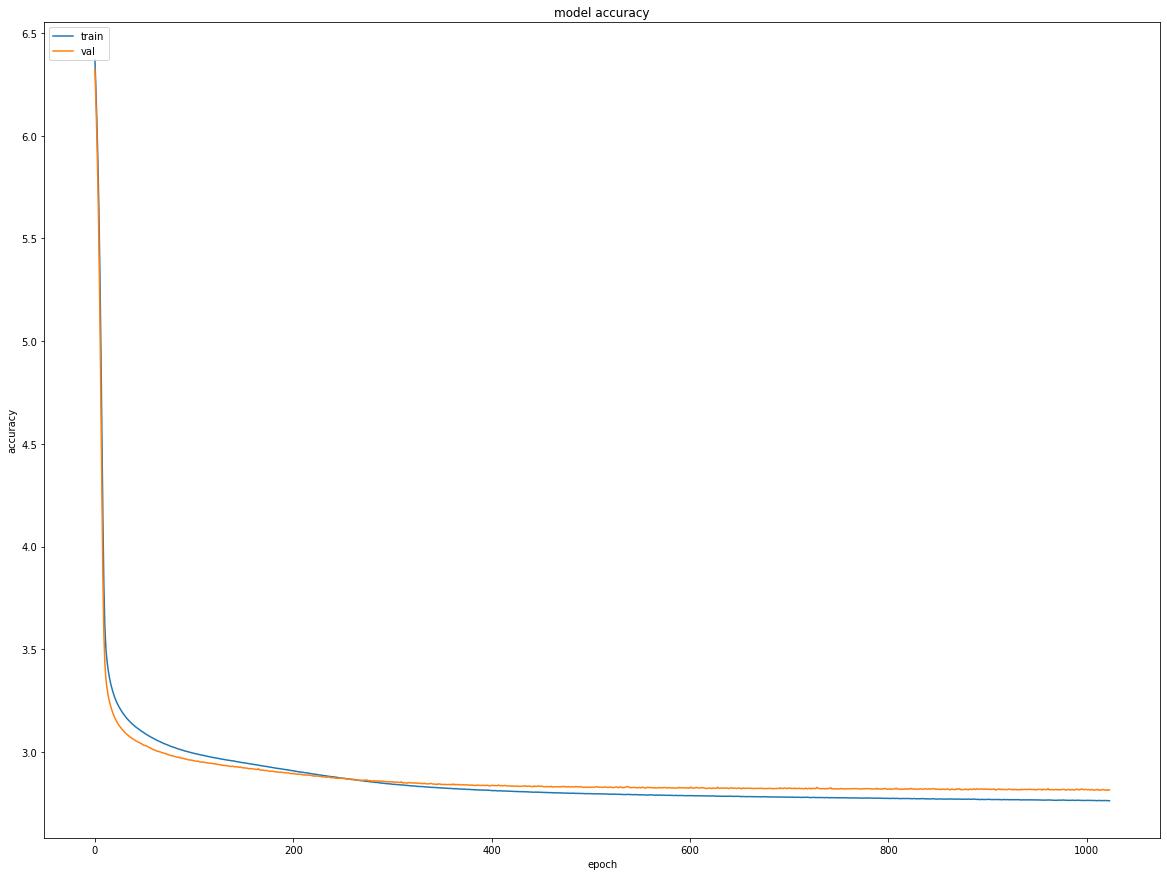

In [4]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.plot(hist1.history['kullback_leibler_divergence'])
plt.plot(hist1.history['val_kullback_leibler_divergence'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

As we see, the final KL-divergence is `2.7425` for the training data, and `2.8078` for the validation data.

We now fit the second model. As mentioned, this fits much better, but that is clearly a case of overfitting.

In [5]:
hist2 = pred.fit(1024, pred.model2)

Epoch 1/1024
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
60/63 [===========================>..] - ETA: 0s - loss: 6.3645 - kullback_leibler_divergence: 6.3217WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f51fc86f9e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAP

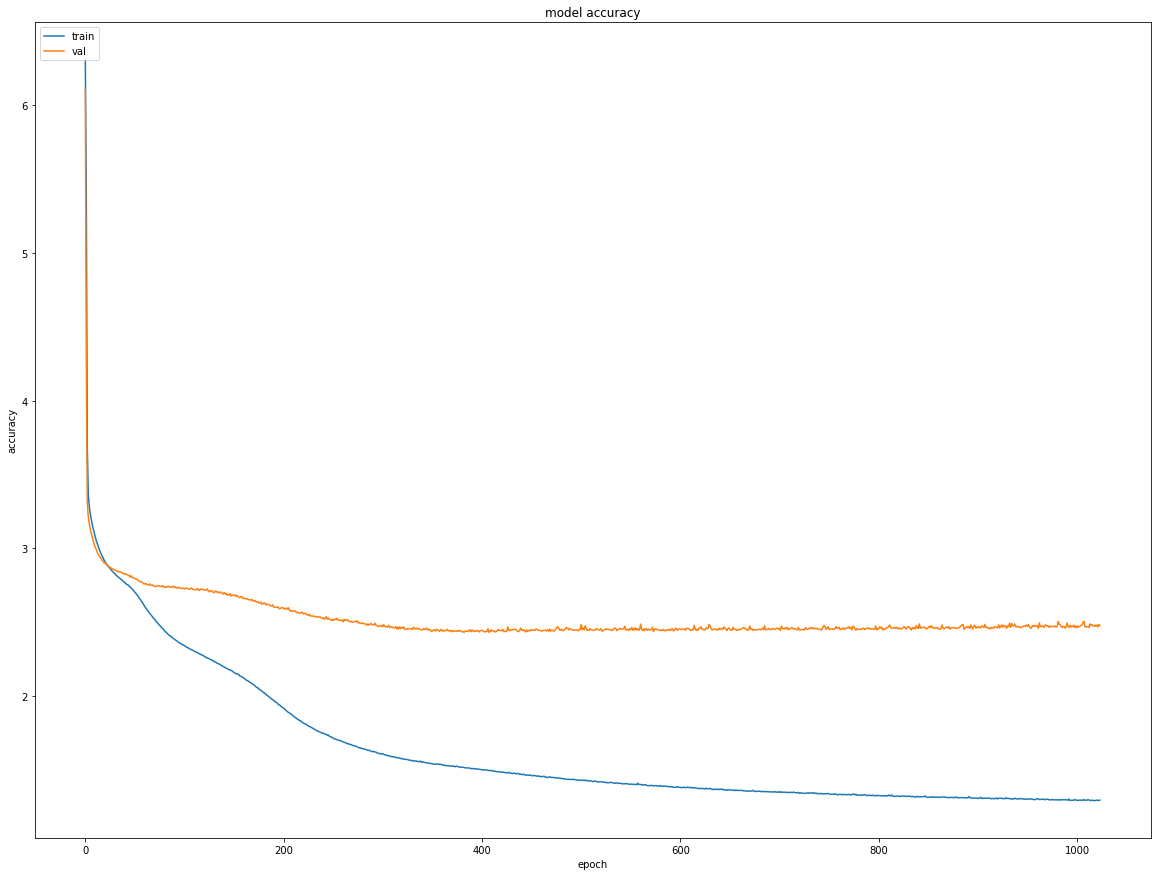

In [6]:
plt.plot(hist2.history['kullback_leibler_divergence'])
plt.plot(hist2.history['val_kullback_leibler_divergence'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

We see the fit keeps improving, reaching `1.2060`, but the validation error flattens, ending at `2.4163`

To do:

* add dropout layers
* use better model for persistence